## Load modules

In [65]:
import glob
from pathlib import Path
import os, sys
import copy
from time import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import pandas as pd
from PIL import Image

import qgm
from qgm import image, parameter, filter, data, fitting, function
from qgm.image import pixel_shift
from qgm import search_atoms
from qgm.deconvolution import deconvolution

from qgm import evaluation
plt.style.use("default")


## Load images

In [66]:
date = '20211208'
dataNo = 2
scanNo = 2

In [67]:
path = os.getcwd()  +'\\'+ date
# path = r"./"+date
path_img = path + "\\data" + str('%03d' % dataNo) + "\\raw"
path_scan = path + "\\scandir\\Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + "\\scandir\\Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [68]:
param_name = 'A0157: OL (H1): AM for physics 2'
scan_param =3.4/4*np.exp((scan_data[param_name]-5.03)/0.646)
unique_param = scan_param.unique()

## Sample image

In [69]:
seq_no = 0

In [70]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print("No Data")

In [71]:
img1 = image.image(trans_files[seq_no])
img1.generate_bg_image(path_img +'\\seq00000_flat001.tiff', True)

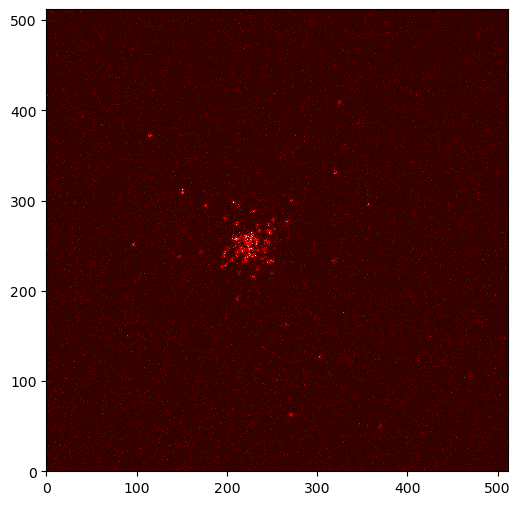

In [72]:
cmap = image.generate_cmap(['#330000', 'r', 'w'])
plt.figure(figsize=(6,6),dpi=100)
plt.subplot(111)
plt.pcolormesh(img1.image,cmap=cmap,vmin=0,vmax=np.max(img1.image)*0.8)
plt.gca().set_aspect('equal')

In [73]:
img1_x = np.sum(img1.image, axis=0)
img1_y = np.sum(img1.image, axis=1)

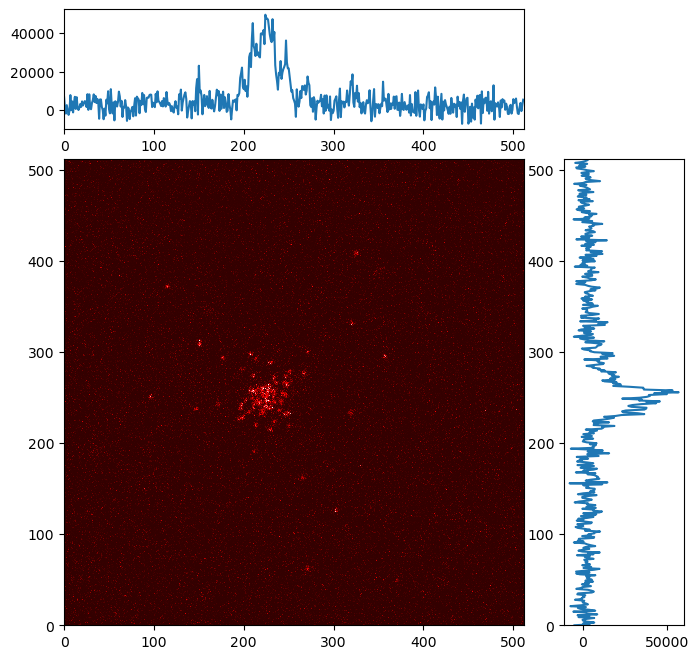

In [96]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=[8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.pcolormesh(img1.image,cmap=cmap,vmin=0,vmax=np.max(img1.image)*0.8)
divider1 = make_axes_locatable(ax1)
ax1X = divider1.append_axes("top",1.2,pad=0.3,sharex=ax1)
ax1X.plot(img1_x)
ax1Y = divider1.append_axes("right",1.2,pad=0.4,sharey=ax1)
ax1Y.plot(img1_y,range(len(img1_y)))

# ax1 = fig.add_subplot(2,2,1)
# ax1.pcolormesh(img1.image, cmap=cmap, vmin=0, vmax=np.max(img1.image)*0.8) 
# ax2 = fig.add_subplot(2,2,3)
# ax2.plot(img1_x)
# ax3 = fig.add_subplot(2,2,2)
# ax3.plot(img1_y, range(len(img1_y)))
# divider1 = make_axes_locatable(ax1)
# ax1X = divider1.append_axes("bottom", 1.2, pad=0.3, sharex=ax1)
# ax1X.bar(range(len(img1_x)),img1_x)
# ax1Y = divider1.append_axes("left", 1.2, pad=0.3, sharey=ax1)
# ax1Y.invert_yaxis()
# ax1Y.bar(range(len(img1_x)),img1_y)
